In [1]:
import gymnasium as gym 
from mdp import environments
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import defaultdict
import pandas as pd 
import numpy as np 

## Simple `gridworld` with `gymnasium`

> Sutton, R. S., & Barto, A. G. (2018). Reinforcement learning: An introduction. MIT press. [link](http://incompleteideas.net/book/the-book-2nd.html) (Example 4.1)

<img src="../imgs/gridworld.png" width=50% />

- **State space**: square grid of N tiles
- **Action space**: {`N`, `E`, `S`, `W`}
- **Reward**: always -1
- **Transition**: $p(a) = 1$ for all the legal moves; $p=0$ for all the moves outside the field

In [2]:
env = gym.make('GridSuttonBarto-v0', size=16)

**Usage example**

In [3]:
observation, info = env.reset()
score, history = 0, []
for _ in range(10):
    current_location = observation
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    score += reward
    a_names = ['north', 'east', 'south', 'west']
    history.append({'s': current_location, 'a': a_names[action], 's_prime': observation, 'r': reward, 'stop': terminated})
    if terminated or truncated:
        observation, info = env.reset()
env.close()

In [4]:
print(score)
pd.DataFrame(history)

-10


,s,a,s_prime,r,stop
0,0,east,1,-1,False
1,1,north,1,-1,False
2,1,south,5,-1,False
3,5,west,4,-1,False
4,4,east,5,-1,False
5,5,east,6,-1,False
6,6,west,5,-1,False
7,5,east,6,-1,False
8,6,east,7,-1,False
9,7,north,3,-1,False


## Policy evaluation and Value iteration

In [5]:
from mdp.gridsb import policy_evaluation, value_iteration

In [6]:
observation, info = env.reset()
pi, V, history = value_iteration(env=env, gamma=1, theta=.00001)

In [7]:
V.reshape(4, -1)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [-1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [11]:
observation, info = env.reset()
V, history = policy_evaluation(env=env, gamma=1, theta=.00001)

In [12]:
V.reshape(4, -1)

array([[-1.7426327 , -1.39999941, -1.39999961, -3.06200989],
       [-3.57053806, -2.19999937, -2.19999959, -4.27751427],
       [-4.27751576, -2.19999959, -2.19999973, -3.57053993],
       [-3.06201383, -1.39999983, -1.39999989, -1.74263496]])

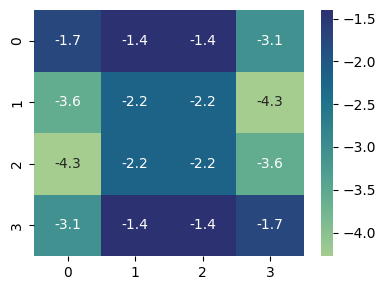

In [13]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(V.reshape(4, -1), ax=ax, annot=True, fmt=".1f", cmap='crest')
plt.tight_layout()
plt.show()